# Level 3 Task 1
# Predictive Modelling

Build a regression model to predict theaggregate rating of a restaurant based on available features.

Split the dataset into training and testing setsand evaluate the model's performance using appropriate metrics.

In [1]:
import pandas as pd
df = pd.read_csv("Preprocessed.csv")
df.head()

,Unnamed: 0,Country Code,City,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Cuisines_Vector,Cuisines_L2_Norm
0,0,162,73,172,121.027535,14.565443,1100,0,1,0,0,0,3,4.8,314,[0. 0. 0. 0. 0...,9.319194
1,1,162,73,600,121.014101,14.553708,1200,0,1,0,0,0,3,4.5,591,[0. 0. 0. 0. 0...,5.250908
2,2,162,75,314,121.056831,14.581404,4000,0,1,0,0,0,4,4.4,270,[0. 0. 0. 0. 0...,10.520663
3,3,162,75,873,121.056475,14.585318,1500,0,0,0,0,0,4,4.9,365,[0. 0. 0. 0. 0...,7.848181
4,4,162,75,873,121.057508,14.584450,1500,0,1,0,0,0,4,4.8,229,[0. 0. 0. 0. 0...,8.808665


In [2]:
df.columns

Index(['Unnamed: 0', 'Country Code', 'City', 'Locality Verbose', 'Longitude',
       'Latitude', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Votes', 'Cuisines_Vector',
       'Cuisines_L2_Norm'],
      dtype='object')

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)

In [4]:
df.dtypes

Country Code              int64
City                      int64
Locality Verbose          int64
Longitude               float64
Latitude                float64
Average Cost for two      int64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Votes                     int64
Cuisines_Vector          object
Cuisines_L2_Norm        float64
dtype: object

# Linear Regression

In [5]:
X = df.drop(["Cuisines_Vector", "Aggregate rating"], axis=1)
y = df["Aggregate rating"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6679, 14), (2863, 14), (6679,), (2863,))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [8]:
std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [10]:
linreg.fit(std_X_train, y_train)

LinearRegression()

In [11]:
y_pred = linreg.predict(std_X_test)

In [12]:
Error_table = [["Model", "R2", "MAE", "MSE", "RMSE"]]

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from numpy import sqrt

Error_table.append(["Linear_Reg", r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), sqrt(mean_squared_error(y_test, y_pred))])

pd.DataFrame(Error_table[1:], columns=Error_table[0])

,Model,R2,MAE,MSE,RMSE
0,Linear_Reg,0.313603,1.050358,1.563949,1.250579


In [14]:
linreg.coef_

array([ 3.37724819e-01, -6.77403523e-02, -1.33286437e-01,  1.40307918e-01,
        4.80248485e-02,  9.68800588e-04, -7.18220484e-02, -4.07185894e-02,
        3.14462478e-01,  6.76993543e-03,  1.47104551e-15,  4.51003986e-01,
        2.21275057e-01,  1.88538516e-01])

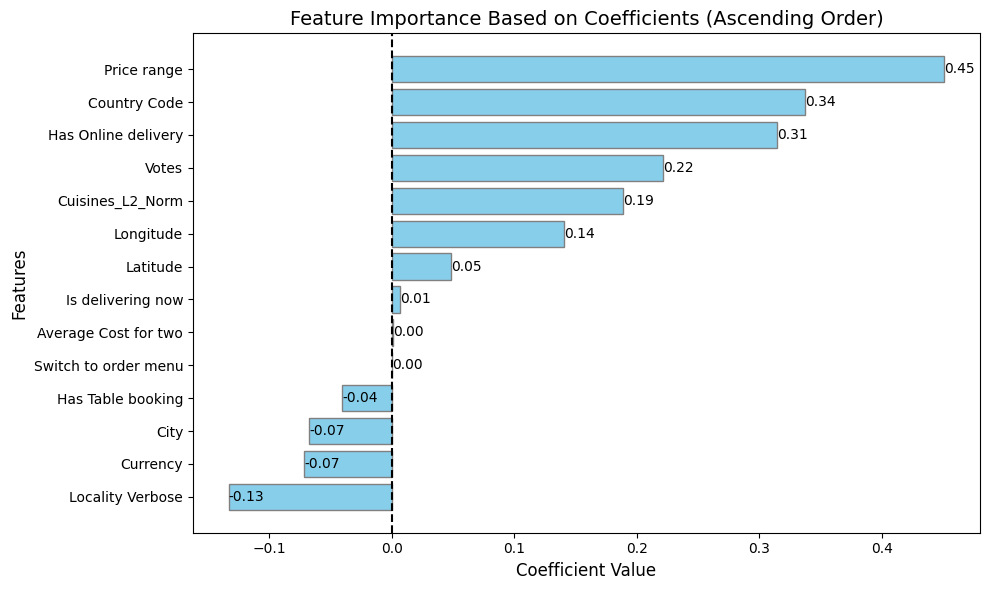

In [15]:
import matplotlib.pyplot as plt
import numpy as np

sorted_indices = np.argsort(linreg.coef_) 
sorted_coef = linreg.coef_[sorted_indices] 
sorted_features = X_train.columns[sorted_indices]  


plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_coef, color='skyblue', edgecolor='grey')

plt.axvline(x=0, color='black', linestyle='--')

plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Based on Coefficients (Ascending Order)', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()

In [17]:
dtc.fit(std_X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred = dtc.predict(std_X_test)

In [19]:
Error_table.append(["Decision Tree", r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), sqrt(mean_squared_error(y_test, y_pred))])

pd.DataFrame(Error_table[1:], columns=Error_table[0])

,Model,R2,MAE,MSE,RMSE
0,Linear_Reg,0.313603,1.050358,1.563949,1.250579
1,Decision Tree,0.917772,0.282920,0.187356,0.432846


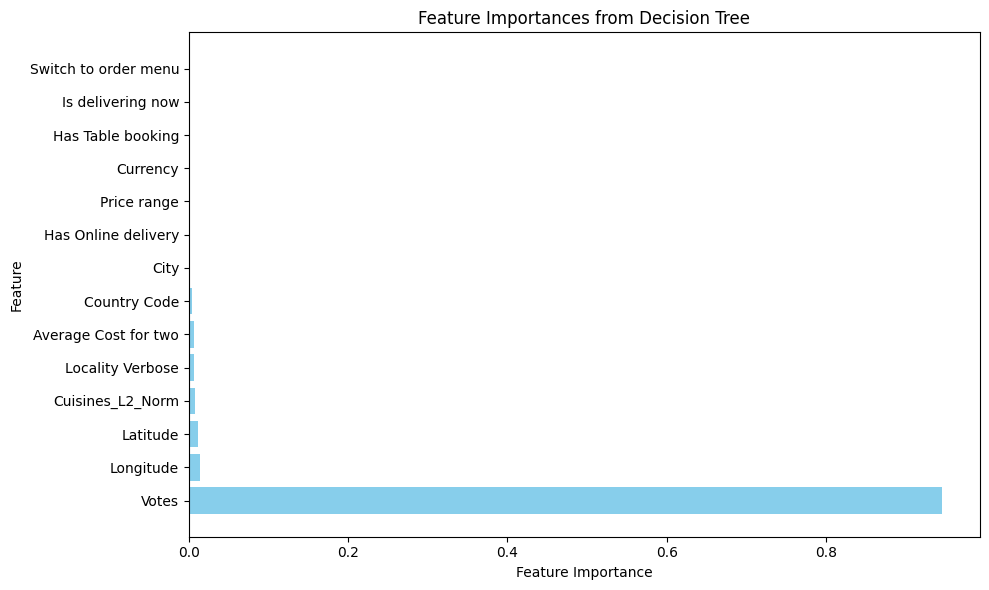

In [20]:
importances = dtc.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))

plt.barh(range(len(importances)), importances[indices], align="center", color='skyblue')

plt.yticks(range(len(importances)), feature_names[indices])

plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Decision Tree")

plt.tight_layout()
plt.show()


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [22]:
rfr.fit(std_X_test, y_test)

RandomForestRegressor()

In [23]:
y_pred = rfr.predict(std_X_test)

In [24]:
Error_table.append(["Random Forest", r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), sqrt(mean_squared_error(y_test, y_pred))])

pd.DataFrame(Error_table[1:], columns=Error_table[0])

,Model,R2,MAE,MSE,RMSE
0,Linear_Reg,0.313603,1.050358,1.563949,1.250579
1,Decision Tree,0.917772,0.282920,0.187356,0.432846
2,Random Forest,0.993829,0.076715,0.014061,0.118580


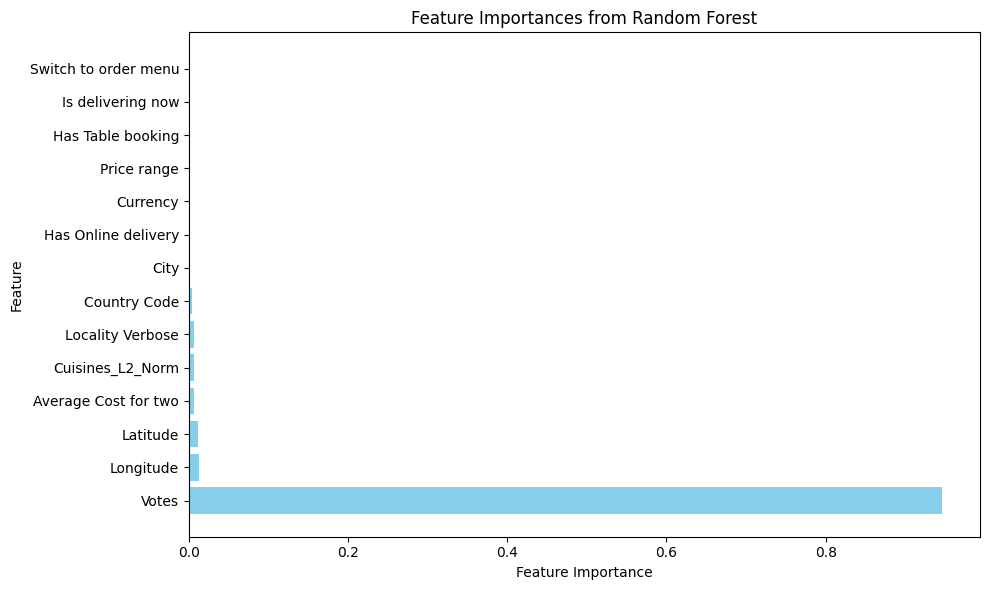

In [25]:
importances = rfr.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))

plt.barh(range(len(importances)), importances[indices], align="center", color='skyblue')

plt.yticks(range(len(importances)), feature_names[indices])

plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Random Forest")

plt.tight_layout()
plt.show()

# LEVEL3 TASK2

# Customer Preference Analysis

Analyze the relationship between the type of cuisine and the restaurant's rating.

In [26]:
df = pd.read_csv("Dataset .csv")

In [27]:
cuisine_rating_df = df[['Cuisines', 'Aggregate rating']].dropna()

cuisine_rating_exploded = cuisine_rating_df.assign(
    Cuisine=cuisine_rating_df['Cuisines'].str.split(', ')
).explode('Cuisine')

#NOTE: This explode function converts a list like row and each element of row into separate column

avg_ratings = cuisine_rating_exploded.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

print(avg_ratings.head(10))



Cuisine
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


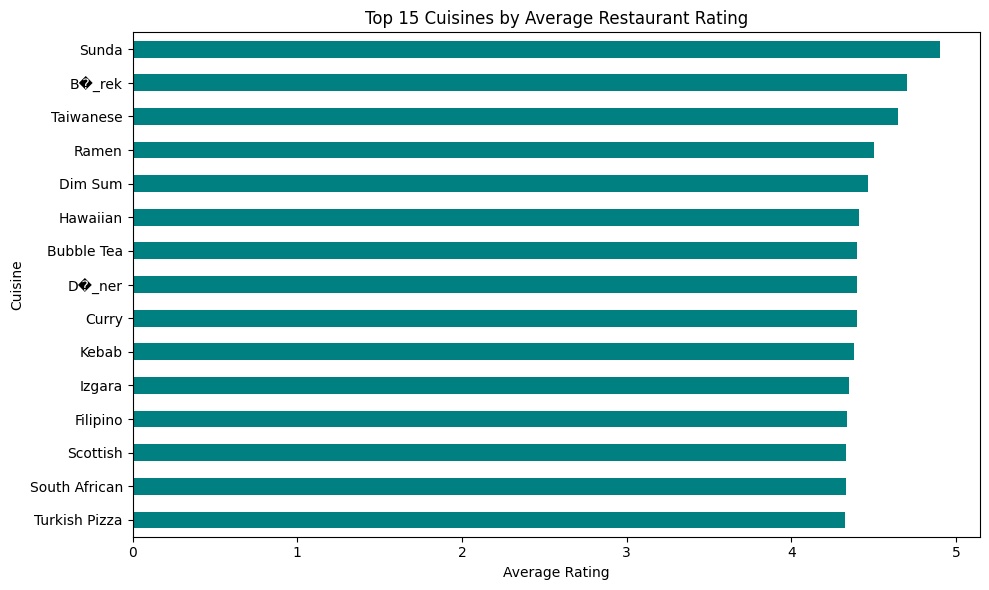

In [28]:
plt.figure(figsize=(10, 6))
avg_ratings.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Cuisines by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


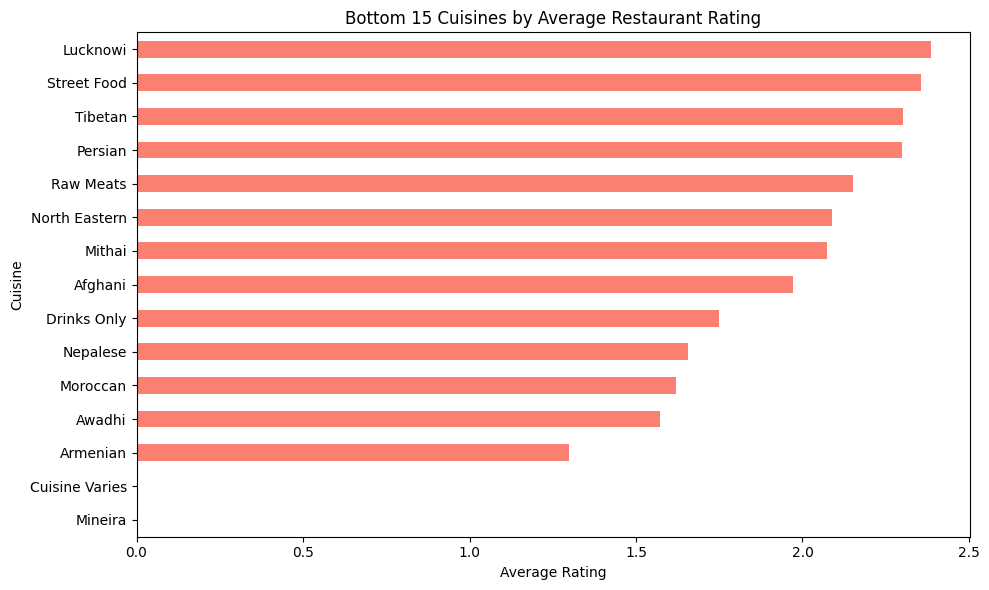

In [29]:
plt.figure(figsize=(10, 6))
avg_ratings.tail(15).plot(kind='barh', color='salmon')
plt.title('Bottom 15 Cuisines by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Identify the most popular cuisines among customers based on the number of votes.

In [30]:
cuisine_rating_df = df[['Cuisines', 'Votes']].dropna()

cuisine_rating_exploded = cuisine_rating_df.assign(
    Cuisine=cuisine_rating_df['Cuisines'].str.split(', ')
).explode('Cuisine')

#NOTE: This explode function converts a list like row and each element of row into separate column

avg_votes = cuisine_rating_exploded.groupby('Cuisine')['Votes'].mean().sort_values(ascending=False)

print(avg_ratings.head(10))

Cuisine
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


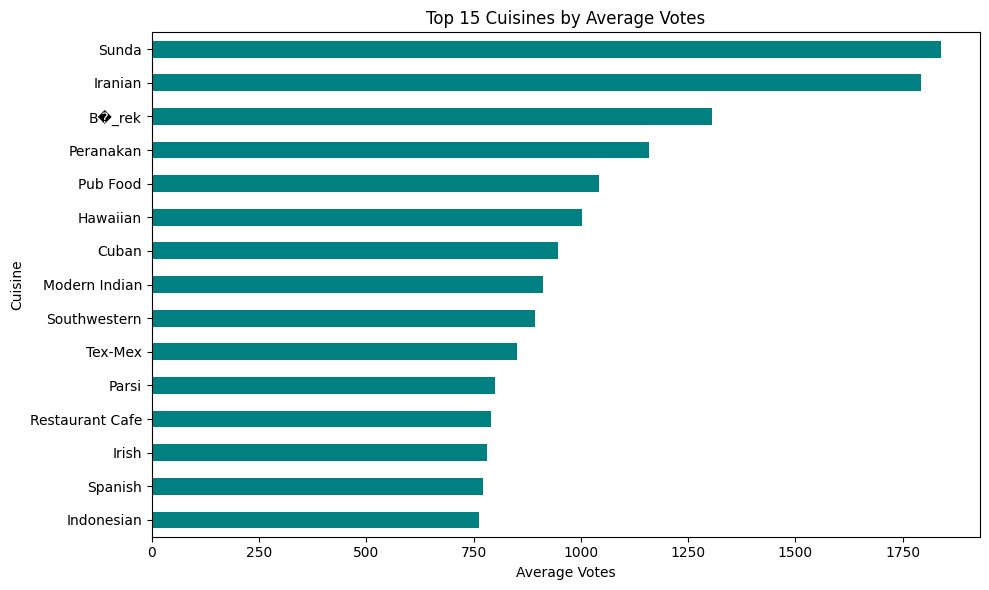

In [31]:
plt.figure(figsize=(10, 6))
avg_votes.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Cuisines by Average Votes')
plt.xlabel('Average Votes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Determine if there are any specific cuisines that tend to receive higher ratings.

In [32]:
#NOTE: Already Done Above

# LEVEL3 TASK3
# DATA VISUALIZATION

Create visualizations to represent the distributionof ratings using different charts (histogram, barplot, etc.).

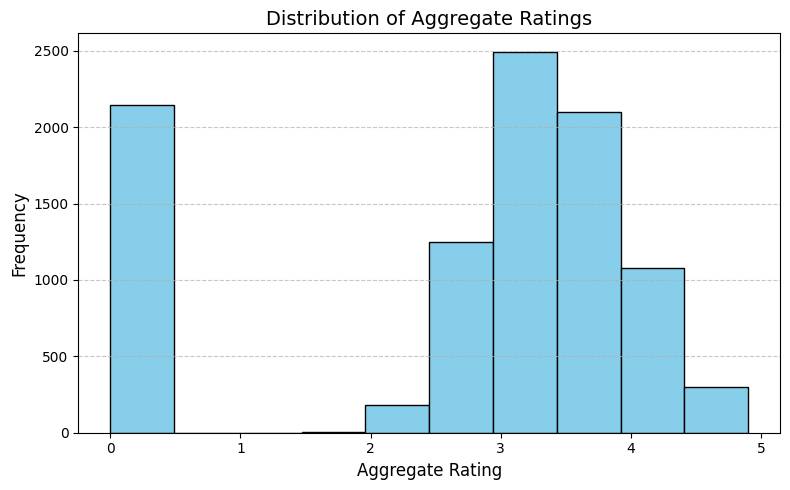

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df["Aggregate rating"].dropna(), bins=10, edgecolor='black', color='skyblue')

plt.title("Distribution of Aggregate Ratings", fontsize=14)
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [34]:
df["Aggregate rating"].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [35]:
rating_count = df["Aggregate rating"].value_counts().reset_index()
rating_count.columns

Index(['Aggregate rating', 'count'], dtype='object')

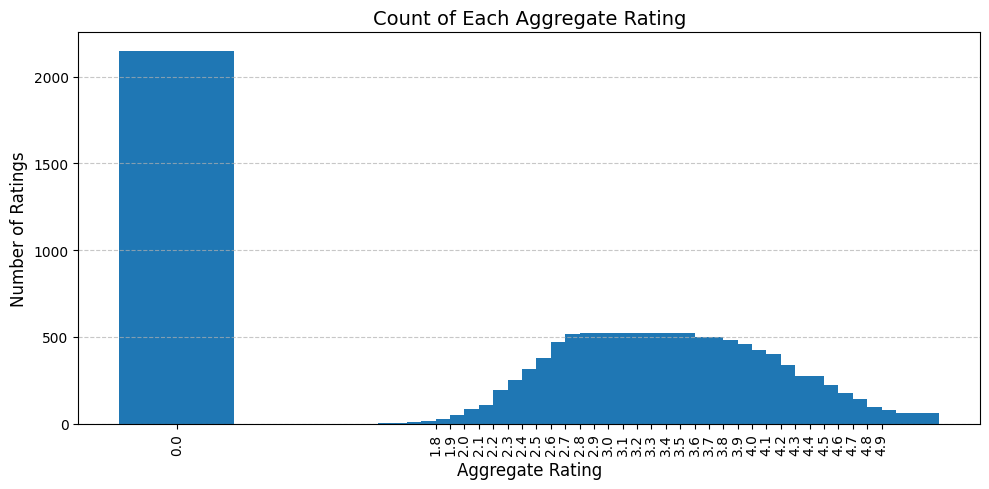

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(rating_count["Aggregate rating"], rating_count["count"]) # color="skyblue", edgecolor="black"

plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.title("Count of Each Aggregate Rating", fontsize=14)

plt.xticks(rating_count["Aggregate rating"], rotation=90)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

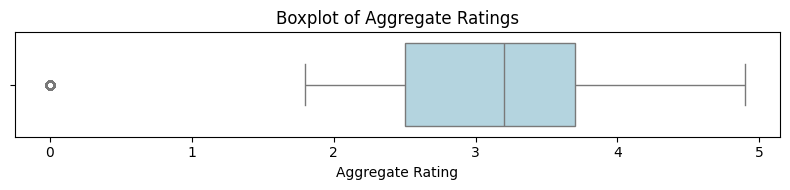

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Aggregate rating"], color="lightblue")

plt.title("Boxplot of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.tight_layout()
plt.show()

Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [38]:
cuisine_rating = df[["Cuisines", "Aggregate rating"]].dropna()

In [39]:
cuisine_rating["Cuisines"] = cuisine_rating["Cuisines"].apply(lambda x: x.split(","))
cuisine_rating = cuisine_rating.explode(column=["Cuisines"])
cuisine_rating.head()

,Cuisines,Aggregate rating
0,French,4.8
0,Japanese,4.8
0,Desserts,4.8
1,Japanese,4.5
2,Seafood,4.4


In [40]:
cuisine_rating.shape

(19710, 2)

In [41]:
avg_cuisine_ratings = cuisine_rating.groupby(by="Cuisines")["Aggregate rating"].mean().reset_index()

In [42]:
avg_cuisine_ratings = avg_cuisine_ratings.sort_values(by="Aggregate rating", ascending=False)
avg_cuisine_ratings

,Cuisines,Aggregate rating
236,Sunda,4.900000
154,Cajun,4.700000
226,Scottish,4.700000
25,B�_rek,4.700000
30,Caribbean,4.666667
...,...,...
140,Awadhi,0.760000
130,Afghani,0.414286
83,Mineira,0.000000
96,Persian,0.000000


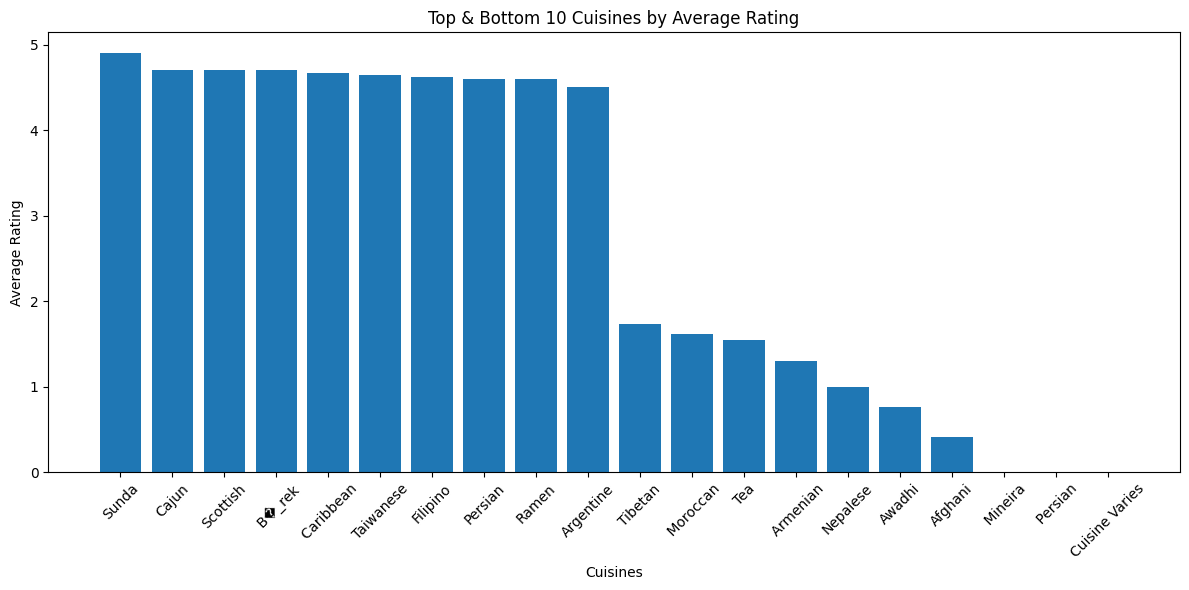

In [43]:
avg_cuisine_ratings_new = pd.concat([
    avg_cuisine_ratings.head(10),
    avg_cuisine_ratings.tail(10)
])

plt.figure(figsize=(12, 6))
plt.bar(avg_cuisine_ratings_new["Cuisines"], avg_cuisine_ratings_new["Aggregate rating"])
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Top & Bottom 10 Cuisines by Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Visualize the relationship between various features and the target variable to gain insights.

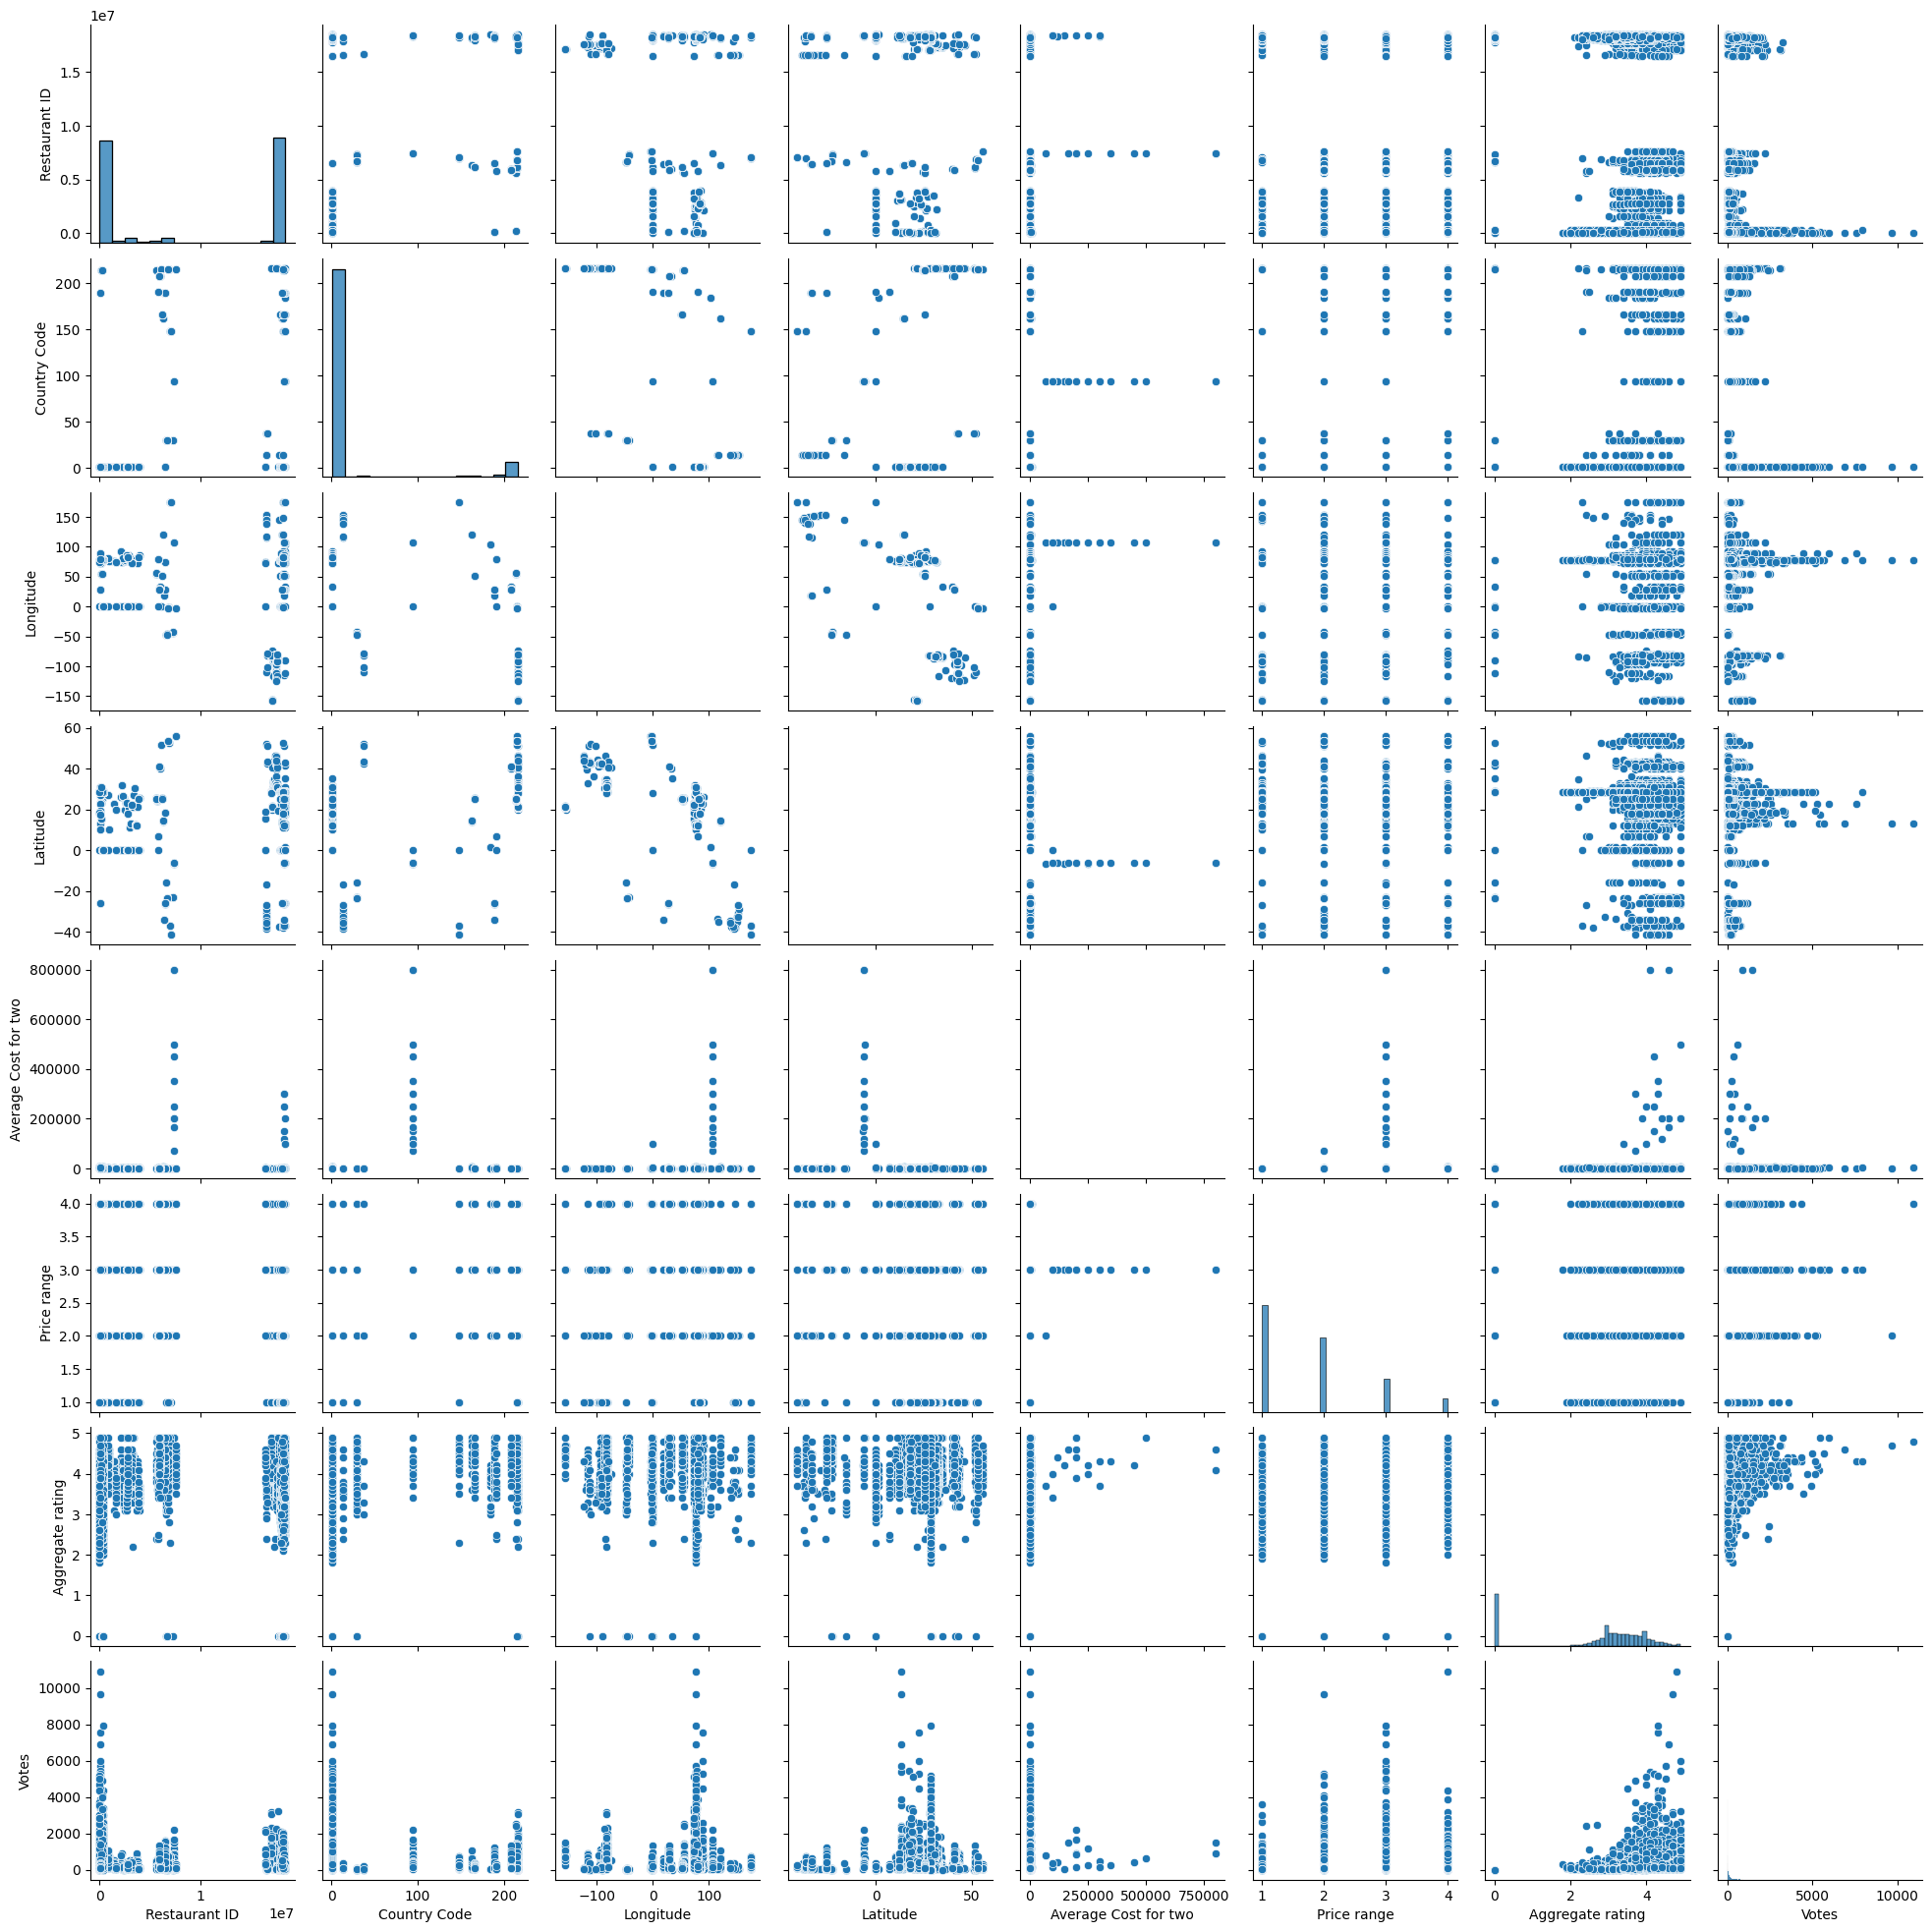

In [44]:
sns.pairplot(df)